<a href="https://colab.research.google.com/github/AbdullahNasser98/Fish-classifictation/blob/master/Fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"abdullahnasser","key":"cf934485d641c4759dcc24e8c3a3a170"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d crowww/a-large-scale-fish-dataset

a-large-scale-fish-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 a-large-scale-fish-dataset.zip   fish.weights.best.hdf5   kaggle.json
 files				 'kaggle (1).json'	   sample_data


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('a-large-scale-fish-dataset.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import cv2 as cv
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

Reading path of images

In [ ]:
img_path = []
for name in glob('/content/files/Fish_Dataset/Fish_Dataset/*/*', recursive=True):
  if name.endswith('.txt') or name.endswith('.m'):
    pass
  else:
    img_path.append(name)

In [ ]:
img_path

['/content/files/Fish_Dataset/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream',
 '/content/files/Fish_Dataset/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream GT',
 '/content/files/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel',
 '/content/files/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel GT',
 '/content/files/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet',
 '/content/files/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet GT',
 '/content/files/Fish_Dataset/Fish_Dataset/Red Mullet/Red Mullet',
 '/content/files/Fish_Dataset/Fish_Dataset/Red Mullet/Red Mullet GT',
 '/content/files/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat',
 '/content/files/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT',
 '/content/files/Fish_Dataset/Fish_Dataset/Trout/Trout GT',
 '/content/files/Fish_Dataset/Fish_Dataset/Trout/Trout',
 '/content/files/Fish_Dataset/Fish_Dataset/Red Sea Bream/Red Sea Bream',
 '/content/files/Fish_Dataset/Fis

Removing GT images

In [ ]:
patches = []
for i in img_path:
  if i.endswith('GT'):
    pass
  else:
    patches += glob(i+'/*.png')

In [ ]:
img_path = patches
img_path = pd.Series(img_path).astype(str)
img_path.head()

0    /content/files/Fish_Dataset/Fish_Dataset/Gilt-...
1    /content/files/Fish_Dataset/Fish_Dataset/Gilt-...
2    /content/files/Fish_Dataset/Fish_Dataset/Gilt-...
3    /content/files/Fish_Dataset/Fish_Dataset/Gilt-...
4    /content/files/Fish_Dataset/Fish_Dataset/Gilt-...
dtype: object

In [ ]:
labels = []
for i in img_path:
  labels.append(i.split('/')[5])

set(labels)

{'Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout'}

In [ ]:
print(len(img_path), len(labels))

9000 9000


In [ ]:
labels = pd.Series(labels)

In [ ]:
df = pd.concat([img_path, labels], axis=1)

In [ ]:
df.head()

,0,1
0,/content/files/Fish_Dataset/Fish_Dataset/Gilt-...,Gilt-Head Bream
1,/content/files/Fish_Dataset/Fish_Dataset/Gilt-...,Gilt-Head Bream
2,/content/files/Fish_Dataset/Fish_Dataset/Gilt-...,Gilt-Head Bream
3,/content/files/Fish_Dataset/Fish_Dataset/Gilt-...,Gilt-Head Bream
4,/content/files/Fish_Dataset/Fish_Dataset/Gilt-...,Gilt-Head Bream


In [ ]:
df = df.rename(columns={0:'path', 1:'label'})

In [ ]:
df.head()

,path,label
0,/content/files/Fish_Dataset/Fish_Dataset/Gilt-...,Gilt-Head Bream
1,/content/files/Fish_Dataset/Fish_Dataset/Gilt-...,Gilt-Head Bream
2,/content/files/Fish_Dataset/Fish_Dataset/Gilt-...,Gilt-Head Bream
3,/content/files/Fish_Dataset/Fish_Dataset/Gilt-...,Gilt-Head Bream
4,/content/files/Fish_Dataset/Fish_Dataset/Gilt-...,Gilt-Head Bream


Check if the classes are balanced

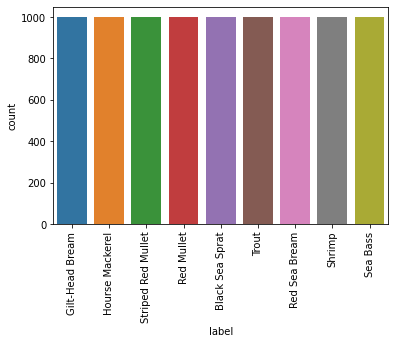

In [ ]:
x = sn.countplot(data=df, x='label')
plt.xticks(rotation=90);

Shuffle the DataFrame before splitting

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,path,label
8599,/content/files/Fish_Dataset/Fish_Dataset/Sea B...,Sea Bass
6824,/content/files/Fish_Dataset/Fish_Dataset/Red S...,Red Sea Bream
51,/content/files/Fish_Dataset/Fish_Dataset/Gilt-...,Gilt-Head Bream
69,/content/files/Fish_Dataset/Fish_Dataset/Gilt-...,Gilt-Head Bream
8767,/content/files/Fish_Dataset/Fish_Dataset/Sea B...,Sea Bass


In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df['path'], df['label'], test_size=0.25, random_state=42)

# X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

df_train = df[:6000]
df_test = df[6000:7500]
df_valid = df[7500:9000]

In [ ]:
print(len(df_train), len(df_test), len(df_valid))

6000 1500 1500


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
input_shape = (224, 224, 3)
batch_size = 32
epochs=100
training_size = 6000
valid_size = 1500

In [ ]:
train_set = datagen.flow_from_dataframe(dataframe = df_train,
                                        x_col='path',
                                        y_col='label',
                                        target_size=(input_shape[0], input_shape[1]),
                                        class_mode='categorical',
                                        batch_size=batch_size,
                                        shuffle=False)

test_set = datagen.flow_from_dataframe(dataframe = df_test,
                                        x_col='path',
                                        y_col='label',
                                        target_size=(input_shape[0], input_shape[1]),
                                        class_mode='categorical',
                                        batch_size=batch_size,
                                        shuffle=False)

valid_set = datagen.flow_from_dataframe(dataframe = df_valid,
                                        x_col='path',
                                        y_col='label',
                                        target_size=(input_shape[0], input_shape[1]),
                                        class_mode='categorical',
                                        batch_size=batch_size,
                                        shuffle=False)

Found 6000 validated image filenames belonging to 9 classes.
Found 1500 validated image filenames belonging to 9 classes.
Found 1500 validated image filenames belonging to 9 classes.


In [ ]:
X_train, y_train = train_set.next()

In [ ]:
X_train.shape

(32, 224, 224, 3)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential


model = Sequential()

model.add(Conv2D(filters=8, kernel_size=2, activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Dropout(0.5))

# model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(2))
# model.add(Dropout(0.5))

#model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(2))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(9, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 223, 223, 8)       104       
_________________________________________________________________
batch_normalization_5 (Batch (None, 223, 223, 8)       32        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 111, 111, 8)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 111, 111, 8)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 110, 110, 16)      528       
_________________________________________________________________
batch_normalization_6 (Batch (None, 110, 110, 16)      64        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 55, 55, 16)       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpointer = ModelCheckpoint(filepath='fish.weights.best.hdf5', verbose=1, save_best_only=True)
early = EarlyStopping(monitor='val_loss',
                      patience=5,
                      verbose=1)
learn = ReduceLROnPlateau(monitor='val_accuracy',
                          patience=2,
                          verbose=1,
                          factor=0.2,
                          min_lr=0.0001)

In [ ]:
import math
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))

steps_per_epoch = compute_steps_per_epoch(training_size)
val_steps = compute_steps_per_epoch(valid_size)

print(steps_per_epoch, val_steps)

188 47


In [ ]:
history = model.fit(train_set,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=valid_set,
                    validation_steps = val_steps,
                    epochs=epochs,
                    callbacks=[checkpointer, learn, early], 
                    verbose=1)

Epoch 1/100
188/188 [==============================] - 72s 380ms/step - loss: 4.1755 - accuracy: 0.6027 - val_loss: 83.3696 - val_accuracy: 0.1387

Epoch 00001: val_loss improved from inf to 83.36964, saving model to fish.weights.best.hdf5
Epoch 2/100
188/188 [==============================] - 71s 380ms/step - loss: 0.3690 - accuracy: 0.8728 - val_loss: 87.0837 - val_accuracy: 0.1807

Epoch 00002: val_loss did not improve from 83.36964
Epoch 3/100
188/188 [==============================] - 71s 380ms/step - loss: 0.1958 - accuracy: 0.9355 - val_loss: 28.5659 - val_accuracy: 0.2667

Epoch 00003: val_loss improved from 83.36964 to 28.56587, saving model to fish.weights.best.hdf5
Epoch 4/100
188/188 [==============================] - 71s 376ms/step - loss: 0.1029 - accuracy: 0.9662 - val_loss: 6.5367 - val_accuracy: 0.4793

Epoch 00004: val_loss improved from 28.56587 to 6.53670, saving model to fish.weights.best.hdf5
Epoch 5/100
188/188 [==============================] - 72s 381ms/step - 

As we can see the model is overfitting.
So we will use transfer learning instead

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

model = VGG16(include_top=False, input_shape=input_shape)
# mark loaded layers as not trainable
for layer in model.layers:
	layer.trainable = False
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(512, activation='relu',)(flat1)
output = Dense(9, activation='softmax')(class1)
	# define new model
model = Model(inputs=model.inputs, outputs=output)
	# compile model

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import math
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))

steps_per_epoch = compute_steps_per_epoch(training_size)
val_steps = compute_steps_per_epoch(valid_size)

print(steps_per_epoch, val_steps)

188 47


In [ ]:
history = model.fit(train_set,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=valid_set,
                    validation_steps = val_steps,
                    epochs=epochs,
                    callbacks=[checkpointer, learn, early], 
                    verbose=1)

Epoch 1/100
188/188 [==============================] - 78s 414ms/step - loss: 0.9637 - accuracy: 0.8240 - val_loss: 0.0968 - val_accuracy: 0.9813

Epoch 00001: val_loss improved from 2.13480 to 0.09683, saving model to fish.weights.best.hdf5
Epoch 2/100
188/188 [==============================] - 78s 413ms/step - loss: 0.0418 - accuracy: 0.9932 - val_loss: 0.0300 - val_accuracy: 0.9967

Epoch 00002: val_loss improved from 0.09683 to 0.03003, saving model to fish.weights.best.hdf5
Epoch 3/100
188/188 [==============================] - 77s 410ms/step - loss: 0.0096 - accuracy: 0.9997 - val_loss: 0.0288 - val_accuracy: 0.9927

Epoch 00003: val_loss improved from 0.03003 to 0.02877, saving model to fish.weights.best.hdf5
Epoch 4/100
188/188 [==============================] - 76s 404ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 0.9980

Epoch 00004: val_loss improved from 0.02877 to 0.01648, saving model to fish.weights.best.hdf5
Epoch 5/100
188/188 [===========